 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
#Declare path and set to the location of the whale returns csv file
whale_path = Path("./Resources/whale_returns.csv")
#create a dataframe from the data in the csv file and use the Date colums as the index
whale_returns_df = pd.read_csv(whale_path,index_col="Date",parse_dates=True,infer_datetime_format=True)
#validate all data has been read
whale_returns_df.shape

(1060, 4)

In [3]:
# Reading whale returns
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
#Declare path and set to the location of the algo daily returns  csv file
algo_daily_file_path = Path("./Resources/algo_returns.csv")
#create a dataframe from the data in the csv file and use the Date colums as the index
algo_daily_df = pd.read_csv(algo_daily_file_path,index_col="Date",parse_dates=True,infer_datetime_format=True)
#validate all data has been read
algo_daily_df.shape

(1241, 2)

In [7]:
# Count nulls
algo_daily_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_daily_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
#Declare path and set to the location of the algo daily returns  csv file
sp_tsx_path = Path("./Resources/sp_tsx_history.csv")
#create a dataframe from the data in the csv file and use the Date colums as the index
sp_tsx_history_df = pd.read_csv(sp_tsx_path,index_col="Date",parse_dates=True,infer_datetime_format=True)
#validate all data has been read
sp_tsx_history_df.shape

(1818, 1)

In [10]:
#check for nulls 
sp_tsx_history_df.isna().sum()

Close    0
dtype: int64

In [11]:
#read some records in the dataframe
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
# create a dictionary that will store the key value pairs of  what has to be replaced and the new value
#here we replace dollar with nothing and also the comma- this will remove the characters
replace_dict = {"\$":"",",":""}
# pass the dictionary to the replace function to replace  
sp_tsx_history_df.replace(replace_dict,regex= True,inplace= True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# chage the data type of the dataframe to float to enable computation
sp_tsx_history_df = sp_tsx_history_df.astype("float")
#check the data type
sp_tsx_history_df.dtypes

Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history_df.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [16]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace=True)

In [17]:
# Rename `Close` Column to be specific to this portfolio.
# renaming  the column to SP_TSX 
sp_tsx_daily_returns.columns = ["SP_TSX"]
sp_tsx_daily_returns.head()

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios_df = pd.concat([whale_returns_df,algo_daily_df,sp_tsx_daily_returns],join="inner",axis="columns")
# check if there is any nulls in the records after joining - could be due to different dates
all_portfolios_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP_TSX                         0
dtype: int64

In [19]:
all_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Portfolios'}, xlabel='Date'>

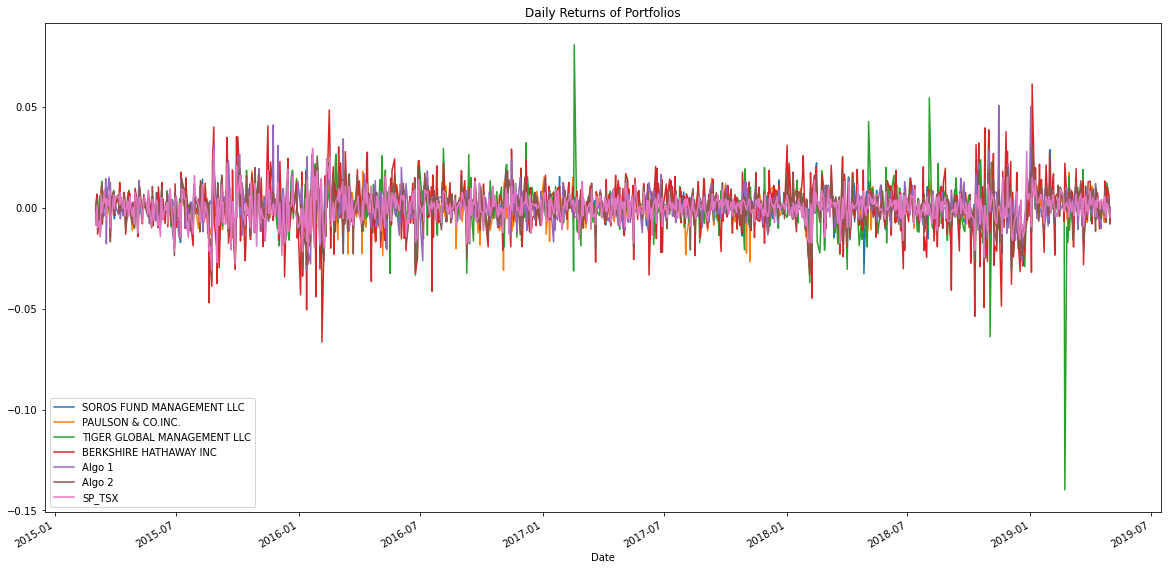

In [20]:
# Plot daily returns of all portfolios
all_portfolios_df.plot(figsize=(20,10), title ="Daily Returns of Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cummulative Returns of Portfolios'}, xlabel='Date'>

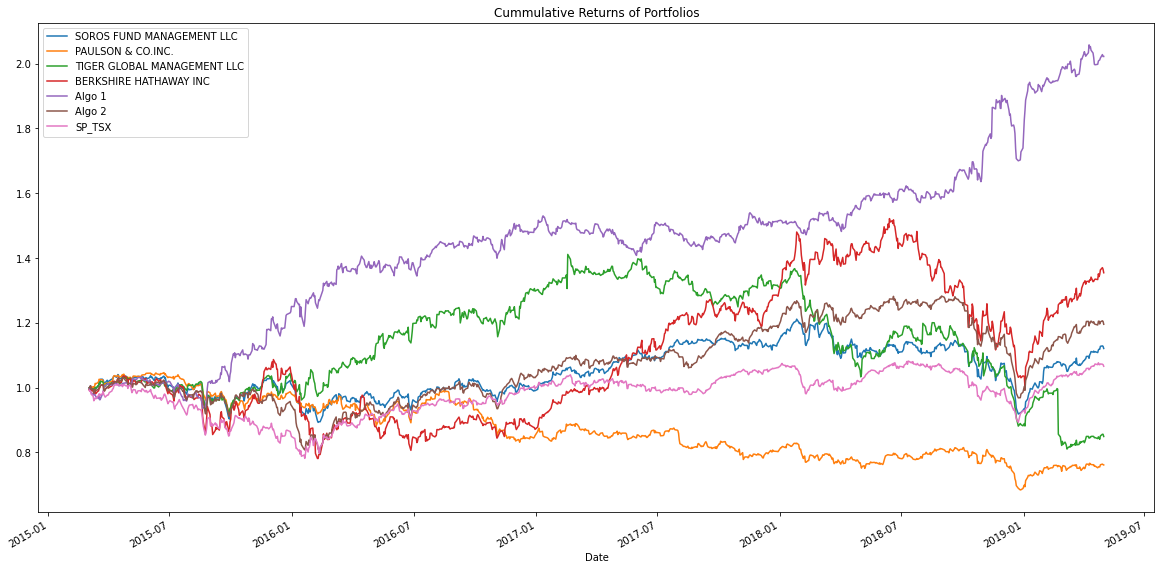

In [21]:
# Calculate cumulative returns of all portfolios
cummulative_returns = (1 + all_portfolios_df).cumprod()
# Plot cumulative returns
cummulative_returns.plot(figsize=(20,10), title ="Cummulative Returns of Portfolios")

---

## Which Portfolios outperform the S&P TSX 60 :

In [22]:
# summation of cummulative returns to determine ranking based on returns - asceding False to show highest first
total_portwise_cum_returns = cummulative_returns.sum().sort_values(ascending=False)
total_portwise_cum_returns

Algo 1                         1484.025248
TIGER GLOBAL MANAGEMENT LLC    1173.619863
BERKSHIRE HATHAWAY INC         1133.832185
Algo 2                         1104.149885
SOROS FUND MANAGEMENT LLC      1080.937886
SP_TSX                         1008.029122
PAULSON & CO.INC.               897.365635
dtype: float64

In [23]:
# filter portfolios that outperform the TSX. These are teh one with higher cummulative returns than the SP TSX
outperform_TSX60 = total_portwise_cum_returns[total_portwise_cum_returns > total_portwise_cum_returns['SP_TSX']]
outperform_TSX60

Algo 1                         1484.025248
TIGER GLOBAL MANAGEMENT LLC    1173.619863
BERKSHIRE HATHAWAY INC         1133.832185
Algo 2                         1104.149885
SOROS FUND MANAGEMENT LLC      1080.937886
dtype: float64

### Answer : Looking at the chart and cummulative returns for all potfolios Algo 1 , Tiger Global, Berkshire Hathway, Algo 2 and Soros fund management all performed better than the S&P TSX 60; in the same order

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

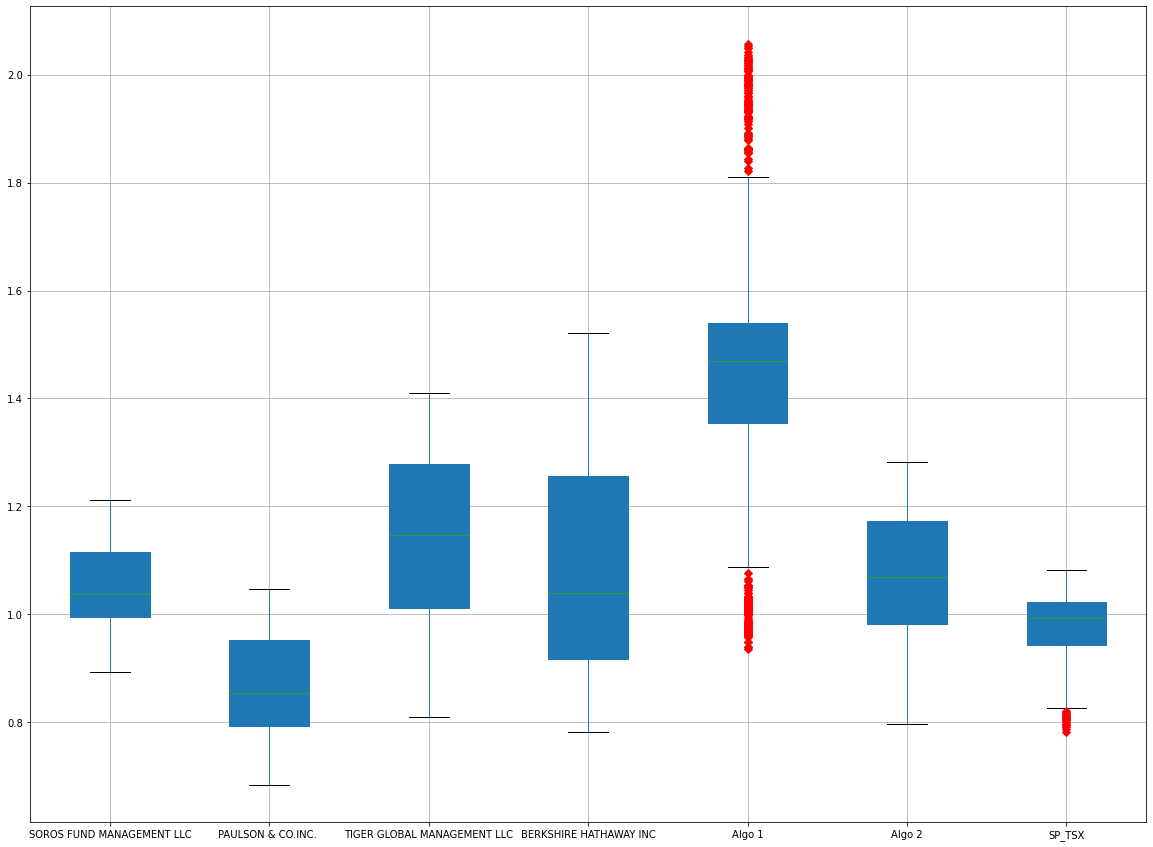

In [24]:
# Box plot to visually show risk
# showing the ouliers in red
cummulative_returns.boxplot(figsize=(20,15),patch_artist=True,manage_ticks=True,sym='rD')

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
all_portfolios_std = all_portfolios_df.std()
all_portfolios_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
SP_TSX                         0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [26]:
# Calculate  the daily standard deviation of S&P TSX 60
# calculate the standard deviation of S&P TSX 60
sp_tsx_std = all_portfolios_df.SP_TSX.std()
sp_tsx_std

0.007034167748577725

In [27]:
# Determine which portfolios are riskier than the S&P TSX 60
# The higher the standard deviation, the riskier the investment.
riskier_than_sptsx = all_portfolios_std[all_portfolios_std > all_portfolios_std['SP_TSX']]
# display the portfolios riskier that S&P TSX 60
# riskiest shown first
riskier_than_sptsx.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
dtype: float64

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std_dev = all_portfolios_std * np.sqrt(252)
annualised_std_dev.sort_values()

PAULSON & CO.INC.              0.110841
SP_TSX                         0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':' 21 Day Rolling Deviations'}, xlabel='Date'>

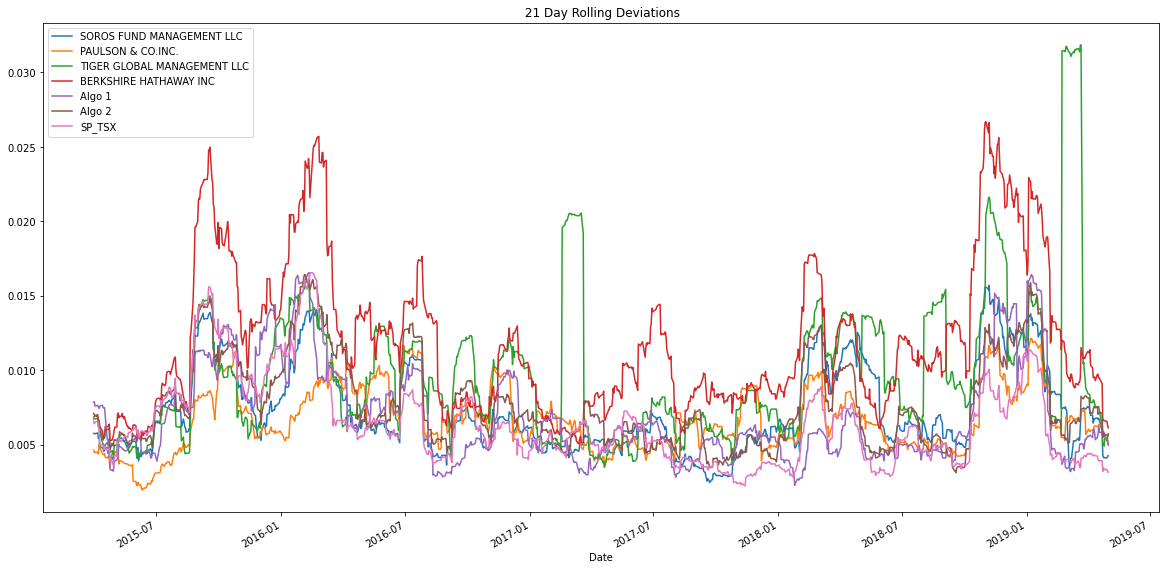

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21day_deviation = all_portfolios_df.rolling(window=21).std()
# delete the null values assigned to the initial 21 days
rolling_21day_deviation.dropna(inplace = True)
# Plot the rolling standard deviation
rolling_21day_deviation.plot(figsize=(20,10), title = " 21 Day Rolling Deviations")

### Calculate and plot the correlation

<AxesSubplot:>

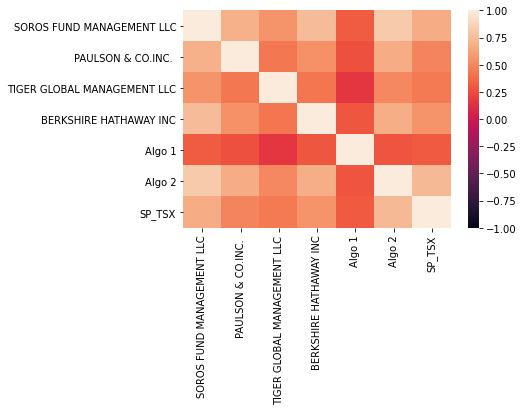

In [30]:
# Calculate the correlation
all_port_corr = all_portfolios_df.corr()
# Display de correlation matrix
sns.heatmap(all_port_corr,vmax= 1, vmin =-1,)

In [31]:
# summation of correlation values to determine the most correlations
# sort values to determine highest and lowest
corr_ranking = all_port_corr.sum().sort_values(ascending =False)
# capture the first record as the portfolio with the most correlation
most_corr_portfolio = corr_ranking.head(1)
most_corr_portfolio

SOROS FUND MANAGEMENT LLC    4.822611
dtype: float64

In [32]:
# capture the last record as the portfolio with the least correlation
least_corr_portfolio = corr_ranking.tail(1)
least_corr_portfolio

Algo 1    2.626504
dtype: float64

### Answer: Looking at the heatmap and correlation totals, Algo 1 has the least correlation and Soros the most correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX
###  Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo1 and S&P TSX 60 Returns'}, xlabel='Date'>

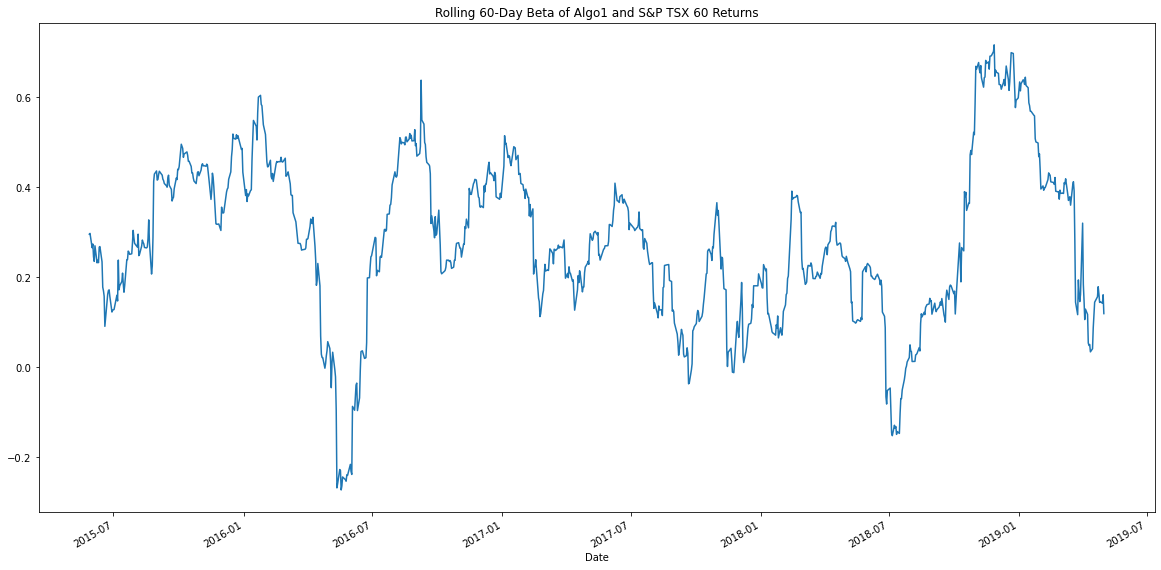

In [33]:
# Calculate covariance of a single portfolio
# calculating the covariance of Algo 1 against S&P TSX 60
covariance_algo1 = all_portfolios_df["Algo 1"].rolling(window=60).cov(all_portfolios_df.SP_TSX) 
# Calculate variance of S&P TSX
sp_tsx_var = all_portfolios_df.SP_TSX.rolling(window=60).var()
# Computing the beta
algo_1_Beta = covariance_algo1 / sp_tsx_var
#drop the null values in the data frame
algo_1_Beta.dropna(inplace=True)
# Plot beta trend
algo_1_Beta.plot(figsize=(20,10) ,title='Rolling 60-Day Beta of Algo1 and S&P TSX 60 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':' 21 Day Rolling Deviations'}, xlabel='Date'>

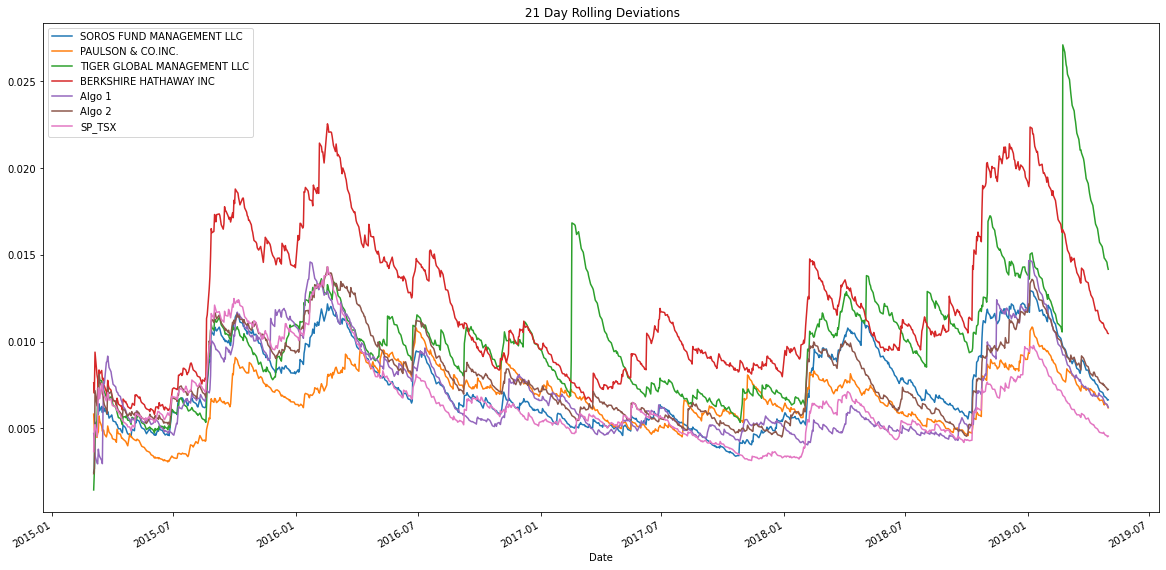

In [34]:
# Use `ewm` to calculate the rolling window
rolling_21day_deviation_ewm = all_portfolios_df.ewm(halflife=21).std()
#plot the ewm deviations
# Plot the ewm rolling standard deviation
rolling_21day_deviation_ewm.plot(figsize=(20,10),  title = " 21 Day Rolling Deviations")

## Extra task to understand ewm: Comparing the output of rolling and ewm 

<AxesSubplot:title={'center':'Rolling 60-Day Beta (Rolling window vs EWA) of Algo1 and S&P TSX 60 Returns'}, xlabel='Date'>

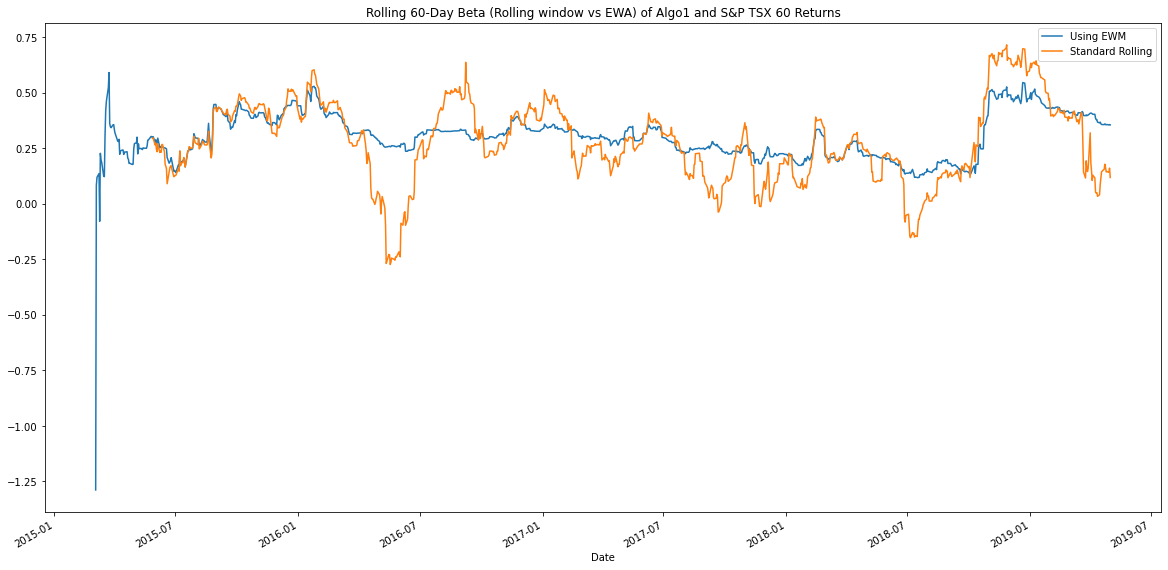

In [35]:
#calculate the covariance of Algo 1 using ewm and halflife of 60 to match previous rolling calculation
covariance_ewm_algo1 = all_portfolios_df["Algo 1"].ewm(halflife=60).cov(all_portfolios_df.SP_TSX) 
# Calculate variance of S&P TSX using ewm
sp_tsx_var_ewm = all_portfolios_df.SP_TSX.ewm(halflife=60).var()
# Computing beta based on ewn 
algo_1_Beta_ewm = covariance_ewm_algo1 / sp_tsx_var_ewm
#drop the null values in the data frame
algo_1_Beta_ewm.dropna(inplace=True)
# Plot beta trend
# capture the axis for the first plot which is the EWM 
axis_ewm = algo_1_Beta_ewm.plot(figsize=(20,10),label="Using EWM" , legend=True, title='Rolling 60-Day Beta (Rolling window vs EWA) of Algo1 and S&P TSX 60 Returns')
#plot the rolling Beta on the same axis
algo_1_Beta.plot(ax=axis_ewm,label="Standard Rolling",legend=True)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [36]:
# calculate Annualized Sharpe Ratios
annualised_sharpe_ratios = all_portfolios_df.mean()*252 / (all_portfolios_df.std()*np.sqrt(252))
#view the annualised sharpe ratios
annualised_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP_TSX                         0.195550
dtype: float64

<AxesSubplot:title={'center':'Whale Portfolio Sharpe Ratios'}>

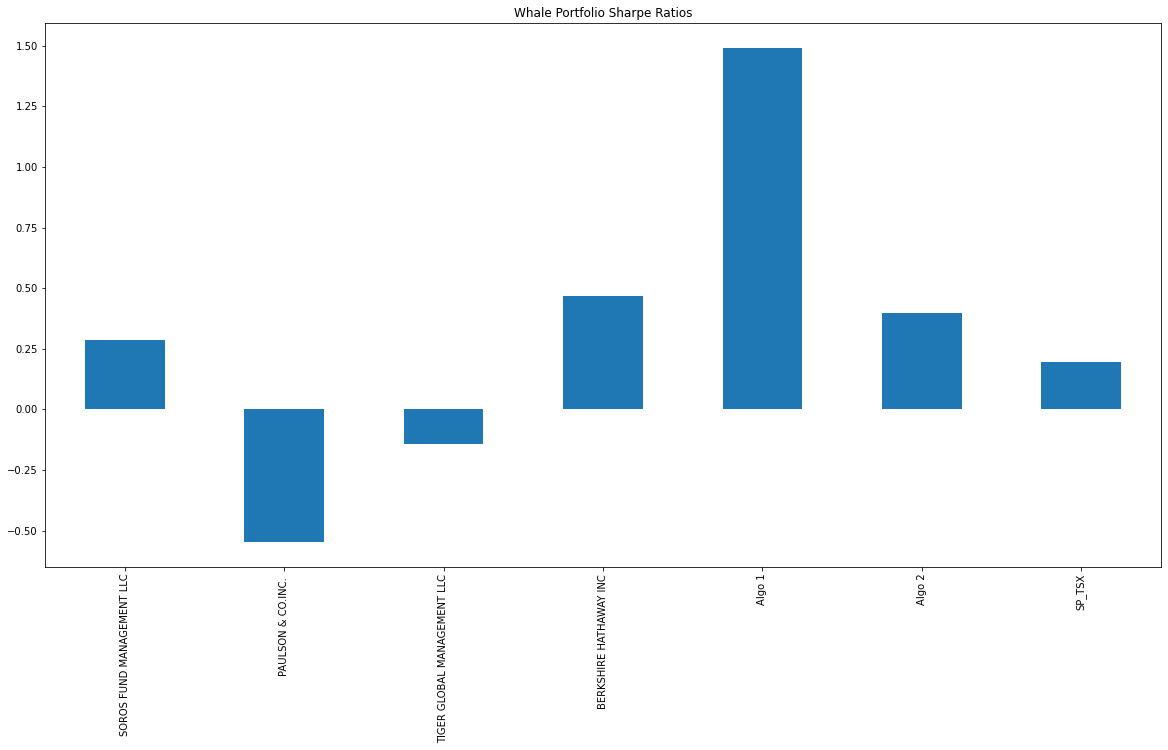

In [37]:
# Visualize the sharpe ratios as a bar plot
#plt.style.use('ggplot')
annualised_sharpe_ratios.plot(kind="bar", title ="Whale Portfolio Sharpe Ratios",figsize=(20,10))

In [38]:
# sort the annualised sharpe ratios to detemine performance order
annualised_sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.491514
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
SP_TSX                         0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
dtype: float64

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
* Based on the sharpe ratios, Algo 1 has outperformed all portfolios.
* BERKSHIRE HATHAWAY has outperformed Algo 2.
* Apart from BERKSHIRE HATHAWAY, Algo 2 has outperfromed other whales portfolios  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this solution, I have selected 5 companies that are listed in the USA and Australia to create a portfolio:

* `McDonalds` - [Mcdonald's Corp](https://www.google.com/finance/quote/MCD:NYSE)

* `Procter and Gamble` - [Procter & Gamble Co](https://www.google.com/finance/quote/PG:NYSE)

* `BHP` - [BHP Group Limited](https://www.google.com/finance/quote/BHP:ASX)

* `Fortescue Metals` - [Fortescue Metals Group Limited](https://www.google.com/finance/quote/FMG:ASX)

* `Rio Tinto` - [Rio Tinto  Limited](https://www.google.com/finance/quote/RIO:ASX)

In [39]:
# Create Path variables to capture location of CSV files 
#USA Stocks
mcd_path = Path("./Resources/GFinance/USA/Stock_Information_McD.csv")
pg_path  = Path("./Resources/GFinance/USA/Stock_Information_PG.csv")
# Australia Stocks
bhp_path = Path("./Resources/GFinance/Aussie/Stock_Information_BHP.csv")
fmg_path = Path("./Resources/GFinance/Aussie/Stock_Information_FMG.csv")
rio_path = Path("./Resources/GFinance/Aussie/Stock_Information_Rio.csv")

In [40]:
# Reading data of USA Stocks
# Parse dates as well as set the index column to Date
mcd_df = pd.read_csv(mcd_path, infer_datetime_format=True, parse_dates=True,index_col="Date")
pg_df = pd.read_csv(pg_path, infer_datetime_format=True, parse_dates=True,index_col="Date")

In [41]:
# Reading data of Australian stocks into a dataframe
# Parse dates as well as set the index column to Date
bhp_df = pd.read_csv(bhp_path, infer_datetime_format=True, parse_dates=True,index_col="Date")
fmg_df = pd.read_csv(fmg_path, infer_datetime_format=True, parse_dates=True,index_col="Date")
rio_df = pd.read_csv(rio_path, infer_datetime_format=True, parse_dates=True,index_col="Date")

In [42]:
# Combine all stocks in a single DataFrame 
my_int_portfolio_df= pd.concat([mcd_df,pg_df,bhp_df,fmg_df,rio_df], join="inner", axis= 1)
# rename columns appropriately
my_int_portfolio_df.columns = ["McDonalds","P&G","BHP","FMG","RIO"]
my_int_portfolio_df.head()

,McDonalds,P&G,BHP,FMG,RIO
Date,,,,,
2014-01-07,96.38,79.28,34.77,4.36,66.00
2014-01-08,95.41,79.65,34.61,4.68,65.35
2014-01-10,95.80,83.14,34.05,3.46,63.65
2014-01-13,94.83,80.01,34.16,5.14,63.51
2014-01-14,95.22,80.87,33.77,5.15,63.35


In [43]:
# Check for Nulls 
my_int_portfolio_df.isna().sum()

McDonalds    0
P&G          0
BHP          0
FMG          0
RIO          0
dtype: int64

In [44]:
# Calculate daily returns
my_port_daily_returns= my_int_portfolio_df.pct_change()
# Drop NAs 
my_port_daily_returns.dropna(inplace=True)
# Display sample data
my_port_daily_returns.head()

,McDonalds,P&G,BHP,FMG,RIO
Date,,,,,
2014-01-08,-0.010064,0.004667,-0.004602,0.073394,-0.009848
2014-01-10,0.004088,0.043817,-0.016180,-0.260684,-0.026014
2014-01-13,-0.010125,-0.037647,0.003231,0.485549,-0.002200
2014-01-14,0.004113,0.010749,-0.011417,0.001946,-0.002519
2014-01-15,0.002520,-0.000989,-0.005922,0.034951,0.014049


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
# setting equal weight for each stock in the portfolio
weights = [1/5,1/5,1/5,1/5,1/5]
# Calculate portfolio return
my_portfolio_returns = my_port_daily_returns.dot(weights)
# Display sample data
my_portfolio_returns.head()


Date
2014-01-08    0.010709
2014-01-10   -0.050995
2014-01-13    0.087762
2014-01-14    0.000574
2014-01-15    0.008922
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame
# concatenate the two frames
combined_port_df = pd.concat([all_portfolios_df,my_portfolio_returns],axis="columns")
# rename my_portfolio column 
combined_port_df.rename(columns= { 0 : 'My Portfolio'},inplace=True)
combined_port_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX,My Portfolio
Date,,,,,,,,
2014-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010709
2014-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050995
2014-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087762
2014-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000574
2014-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008922


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_port_df.dropna(inplace=True)
combined_port_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP_TSX                         0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`
annualised_combined_std_dev = combined_port_df.std() * np.sqrt(252)
annualised_combined_std_dev.sort_values(ascending=False)

My Portfolio                   0.587138
BERKSHIRE HATHAWAY INC         0.208133
TIGER GLOBAL MANAGEMENT LLC    0.176142
Algo 2                         0.133973
SOROS FUND MANAGEMENT LLC      0.126770
Algo 1                         0.122243
SP_TSX                         0.112961
PAULSON & CO.INC.              0.111202
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

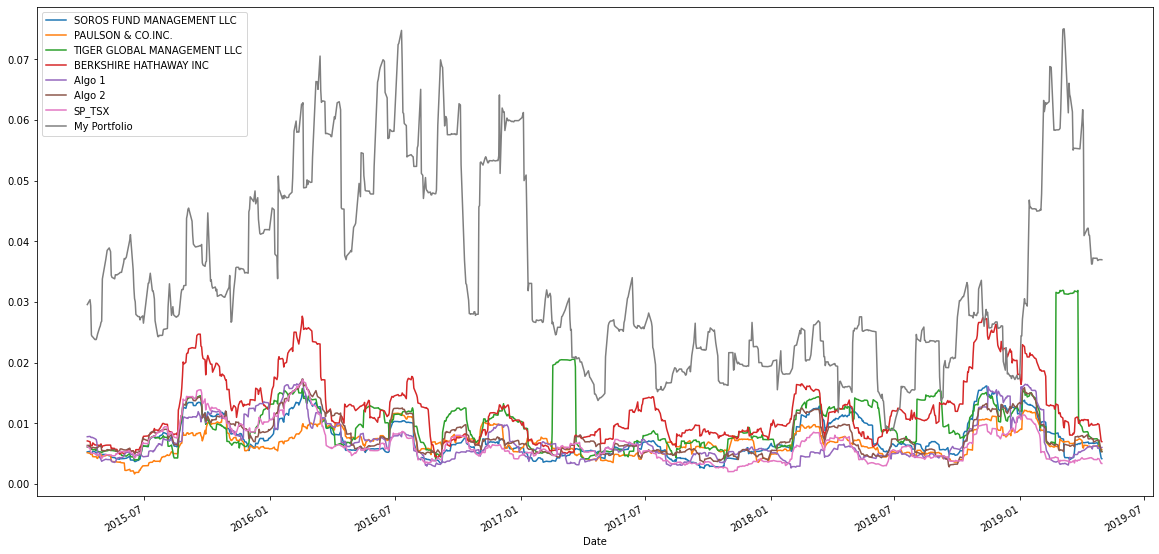

In [49]:
# Calculate rolling standard deviation
# window is 21 days
combined_rolling_std_deviation = combined_port_df.rolling(window=21).std()
# Plot rolling standard deviation
combined_rolling_std_deviation.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

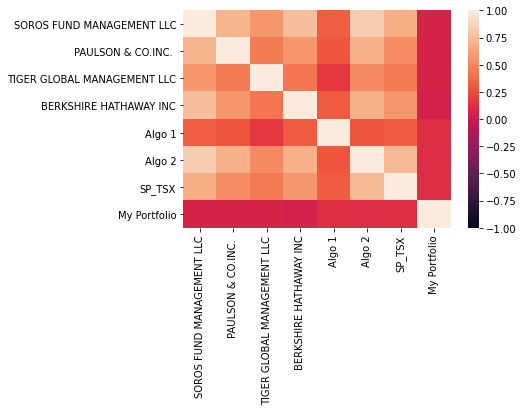

In [50]:
# Calculate and plot the correlation
combined_port_corr = combined_port_df.corr()
#plot the correlation
sns.heatmap(combined_port_corr,vmax=1,vmin=-1)

In [51]:
# sort the coorelation to determine most and least correlated portfolios
combined_port_corr.sum().sort_values(ascending = False)

SOROS FUND MANAGEMENT LLC      4.948101
Algo 2                         4.898778
SP_TSX                         4.408529
BERKSHIRE HATHAWAY INC         4.385441
PAULSON & CO.INC.              4.316291
TIGER GLOBAL MANAGEMENT LLC    3.635798
Algo 1                         2.817725
My Portfolio                   1.625261
dtype: float64

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'60-day Rolling Beta for My Portfolio compared to the S&P 60 TSX '}, xlabel='Date'>

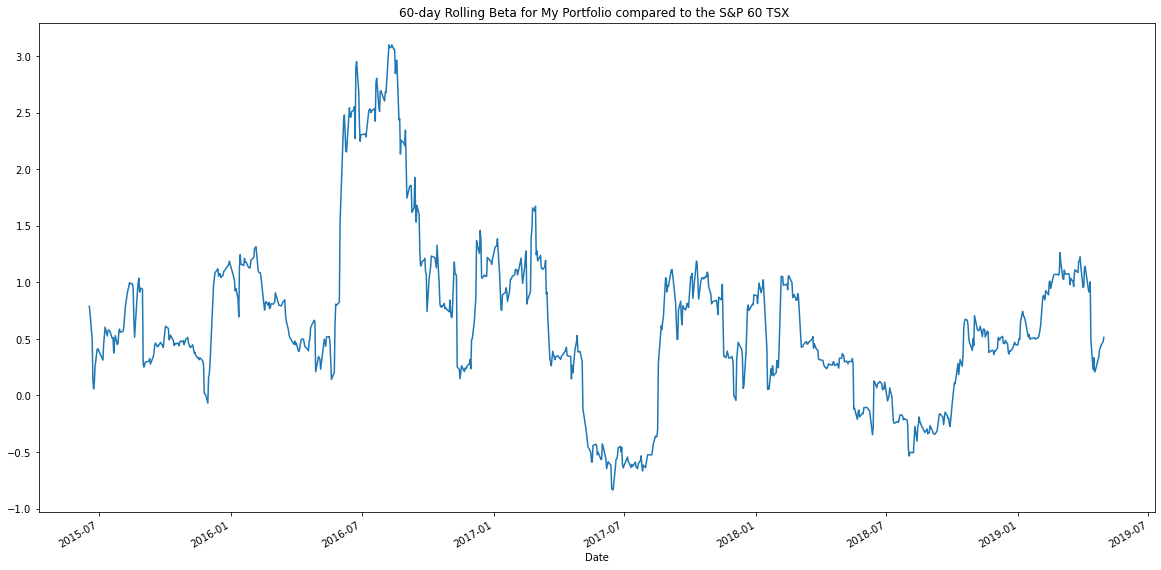

In [52]:
# Calculate and plot Beta
# calculate the covariance of my portfolio compare to S&P 60 
covariance_my_port = combined_port_df['My Portfolio'].rolling(window=60).cov(combined_port_df.SP_TSX)
# Calculate variance of S&P TSX with a 60 day rolling window
market_SPTSX_var = combined_port_df.SP_TSX.rolling(window=60).var()
#calculate the beta of my portfolio
my_port_beta_TSX = covariance_my_port/market_SPTSX_var
#drop nulls
my_port_beta_TSX.dropna(inplace=True)
#plot the beta of my portfolio
my_port_beta_TSX.plot(figsize=(20,10),title = "60-day Rolling Beta for My Portfolio compared to the S&P 60 TSX ")


In [53]:
# use describe to understand the skew of the beta 
my_port_beta_TSX.describe()

count    833.000000
mean       0.639976
std        0.722832
min       -0.835237
25%        0.279174
50%        0.515198
75%        1.018361
max        3.100401
dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualzied Sharpe Ratios
annualised_combined_sharpe_ratios = combined_port_df.mean()*252 / (combined_port_df.std()*np.sqrt(252))
# sort the sharpe values to show highest first
annualised_combined_sharpe_ratios.sort_values(ascending=False)

My Portfolio                   1.516537
Algo 1                         1.402323
Algo 2                         0.237585
BERKSHIRE HATHAWAY INC         0.111523
SP_TSX                         0.093119
SOROS FUND MANAGEMENT LLC      0.032062
TIGER GLOBAL MANAGEMENT LLC   -0.111617
PAULSON & CO.INC.             -0.672001
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

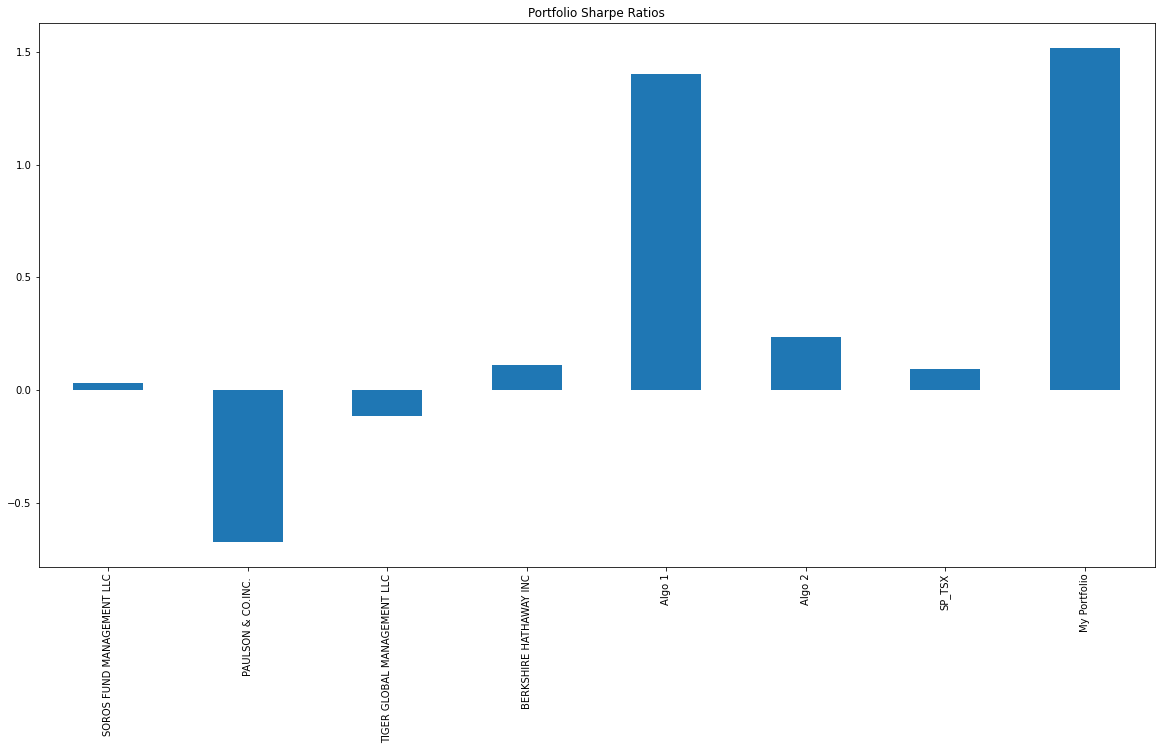

In [55]:
# Visualize the sharpe ratios as a bar plot
annualised_combined_sharpe_ratios.plot(kind="bar", title ="Portfolio Sharpe Ratios",figsize=(20,10))

### How does your portfolio do?

* Looking at the standard deviation, my portfolio has higher risk.
* Looking at correlation, my portfolio has the least correlation to the other portfolios and S&P TSX 60.
* Looking at the beta, my portfolio is more volatile than the S&P TSX 60.
* Looking at the Sharpe ratios, my portfolio has performed very well, on a risk adjusted basis.
